### ex7_pca: Principal component analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import minimize
from scipy.io import loadmat

#### Part I : Load example data set

In [2]:
print('Visualizing example dataset for PCA.\n');

#  The following command loads the dataset. You should now have the 
#  variable X in your environment
mat = loadmat('ex7data1.mat')
X = np.array(mat["X"])
print('Dimension of X is: ',X.shape)

Visualizing example dataset for PCA.

Dimension of X is:  (50, 2)


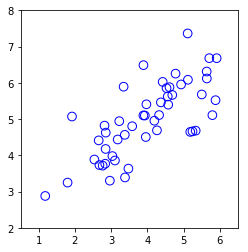

In [3]:
plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')

#### Part 2: Principal Component Analysis


In [4]:
def featureNormalize(X):
    mu=X.mean(axis=0)
    sigma=X.std(axis=0, ddof=1)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma

In [5]:
print('Running PCA on example dataset.\n');

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

Running PCA on example dataset.



In [6]:
def pca(X_norm):
    import scipy.linalg as linalg
    m,n=X.shape
    cov=1/m*np.dot(X_norm.T, X_norm)
    U,S,V=np.linalg.svd(cov)
    S = linalg.diagsvd(S, len(S), len(S))
    return U,S,V

#  Run PCA
U, S,V = pca(X_norm)

In [7]:
import matplotlib.pyplot as plt

def drawLine(p1, p2, **kwargs):
#   DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)
    # [p1[0], p2[0]] is the x part
    # [p1[1], p2[1]] is the y part

Top eigenvector: 

 U(:,0) =  -0.707106781187 -0.707106781187

(you should expect to see -0.707107 -0.707107)



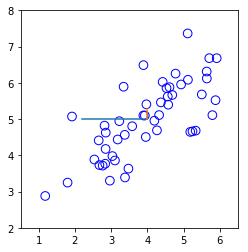

In [8]:
#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')

drawLine(mu, mu + 1.5 * S[0] * U[:,0]);
drawLine(mu, mu + 1.5 * S[1] * U[:,1]);

print('Top eigenvector: \n');
print(' U(:,0) = ', U[0,0], U[1,0]);
print('\n(you should expect to see -0.707107 -0.707107)\n');

#### Part 3: Dimension Reduction

You should now implement the projection step to map the data onto the  first k eigenvectors. The code will then plot the data in this reduced dimensional space.  This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it.


Dimension reduction on example dataset.




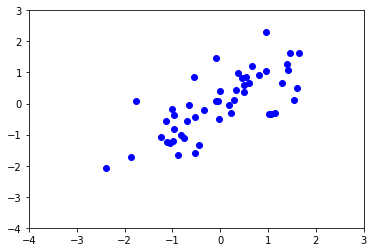

In [9]:
print('\nDimension reduction on example dataset.\n\n');

#  Plot the normalized dataset (returned from pca)
plt.scatter(X_norm[:,0], X_norm[:,1], color='b', marker='o');
plt.axis([-4, 3, -4, 3]); 

In [10]:
def projectData(X, U, K):
#PROJECTDATA Computes the reduced data representation when projecting only 
#on to the top k eigenvectors
#   Z = projectData(X, U, K) computes the projection of 
#   the normalized inputs X into the reduced dimensional space spanned by
#   the first K columns of U. It returns the projected examples in Z.
#

# You need to return the following variables correctly.
    Z = np.zeros((X.shape[0],K));
    Z=np.dot(X,U[:,0:K])
    return Z

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the projection of the data using only the top K 
#               eigenvectors in U (first K columns). 
#               For the i-th example X(i,:), the projection on to the k-th 
#               eigenvector is given as follows:
#                    x = X(i, :)';
#                    projection_k = x' * U(:, k);

In [90]:
U.shape

(3, 3)

In [11]:
#  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
print('Projection of the first example: {:f}'.format(Z[0,0]))
print('\n(this value should be about 1.481274)');

Projection of the first example: 1.481274

(this value should be about 1.481274)


In [12]:
def recoverData(Z, U, K):
#RECOVERDATA Recovers an approximation of the original data when using the 
#projected data
#   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
#   original data that has been reduced to K dimensions. It returns the
#   approximate reconstruction in X_rec.
#

# You need to return the following variables correctly.
    X_rec=np.zeros((Z.shape[0], U.shape[0]))
    X_rec=Z.dot(U[:,0:K].T)
    return X_rec

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the approximation of the data by projecting back
#               onto the original space using the top K eigenvectors in U.
#
#               For the i-th example Z(i,:), the (approximate)
#               recovered data for dimension j is given as follows:
#                    v = Z(i, :)';
#                    recovered_j = v' * U(j, 1:K)';
#
#               Notice that U(j, 1:K) is a row vector.
#               

In [13]:
X_rec  = recoverData(Z, U, K);
print('Approximation of the first example: {:f} {:f}\n'.format(X_rec[0,0], X_rec[0,1]));
print('\n(this value should be about  -1.047419 -1.047419)\n\n');

Approximation of the first example: -1.047419 -1.047419


(this value should be about  -1.047419 -1.047419)




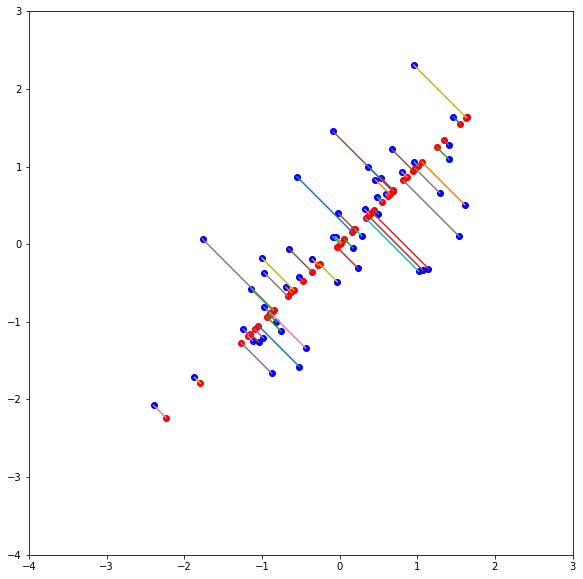

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0], X_norm[:,1], color='b', marker='o');
plt.axis([-4, 3, -4, 3]); 
#  Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:,0], X_rec[:,1], color='r', marker='o');
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:]);
plt.gca().set_aspect('equal', adjustable='box')

#### Part 4: Loading and Visualizing Face Data

We start the exercise by first loading and visualizing the dataset.The following code will load the dataset into your environment.

Each row of X corresponds to one face image (a row vector of length 1024). 

In [15]:
print('\nLoading face dataset.');

#  Load Face dataset
face=loadmat('ex7faces.mat')
X=face['X']
print(X.shape)


Loading face dataset.
(5000, 1024)


In [16]:
def displayData(X, example_width):
    """
    DISPLAYDATA Display 2D data in a nice grid 
    [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data  stored in X in a nice grid. 
    It returns the figure handle h and the display array if requested
    """
    # closes previously opened figure. Prevent a warning after open too many figures
    plt.close()
    # create new figure
    plt.figure()
    plt.figure(figsize=(7,7))
    
    # Turn 1-D X array into 2D
    if X.ndim==1:
        X=np.reshape(X,(-1,X.shape[0]))
    
# Set example_width automatically if not passed in
    if not example_width or not "example_width" in locals():
        example_width=int(round(math.sqrt(X.shape[1])))

# Gray Image
    plt.set_cmap("gray")

# Compute rows, cols
    m,n=X.shape
    example_height = int((n / example_width))

# Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))

# Between images padding
    pad = 1;

# Setup blank display
    display_array = - np.ones((int(pad + display_rows * (example_height + pad)),int(pad + display_cols * (example_width + pad))))

# Copy each example into a patch on the display array
    curr_ex = 1;
    for j in range(1,display_rows+1):
        for i in range(1,display_cols+1):
            if curr_ex > m:
                break; 

# Get the max value of the patch
            max_val = max(abs(X[curr_ex-1, :]))
            rows=pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols=pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
    
            display_array[rows[0]:rows[-1]+1, cols[0]:cols[-1]+1]=np.reshape(X[curr_ex-1,:],(example_height, example_width), order='F')/max_val
            curr_ex+=1
        if curr_ex>m:
            break
    h=plt.imshow(display_array,vmin=-1, vmax=1)
    
    # do not show axis
    plt.axis('off')
    plt.show(block=False)

    return h, display_array


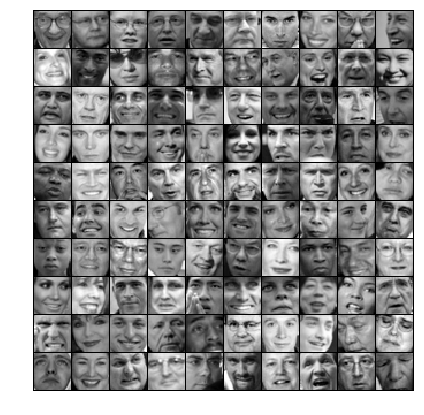

In [17]:
#  Display the first 100 faces in the dataset

displayData(X[0:100,:], example_width=False);


#### Part 5:  PCA on Face Data: Eigenfaces

Each PCA in U is a vector of length n, where for the face data n=1024. We can visualize then into a 32*32 matrix that corresponds to the pixels in the original dataset. And we only display the first 36 principal components that describes the largest variation. 

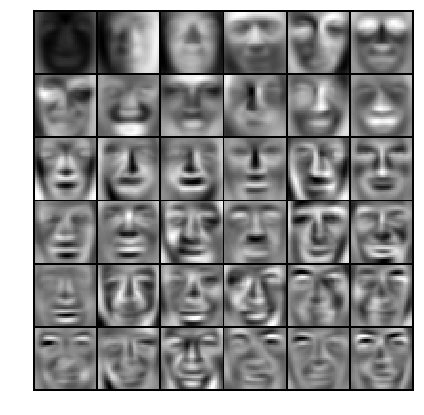

In [18]:
#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

#  Run PCA
[U, S, V] = pca(X_norm);

#  Visualize the top 36 eigenvectors found
displayData(U[:,0:36].T, example_width=False);

#### Part 6 Dimension Reduction for Faces

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimensions of the face dataset. This allows you to use your learning algorithm with a smaller impute size (100 dimensions) instead of the original 100 dimensions.

In [19]:
print('\nDimension reduction for face dataset.');

K = 100;
Z = projectData(X_norm, U, K);

print('The projected data Z has a size of: ')
print('{:d} {:d} '.format(Z.shape[0], Z.shape[1]));



Dimension reduction for face dataset.
The projected data Z has a size of: 
5000 100 


#### Part 7: Visualization of Faces after PCA Dimension Reduction 

Project images to the eigen space using the top K eigen vectors and  visualize only using those K dimensions Compare to the original input, which is also displayed


Visualizing the projected (reduced dimension) faces.


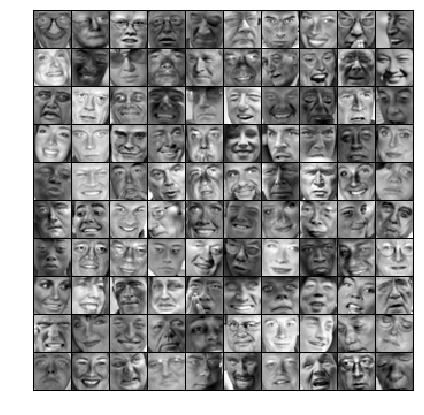

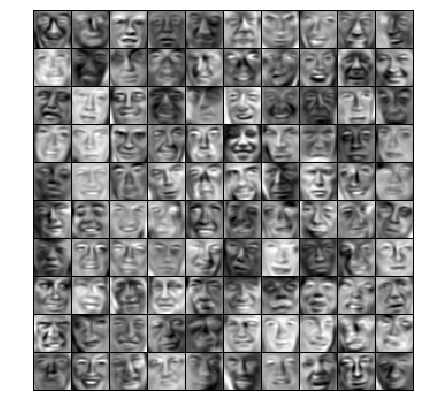

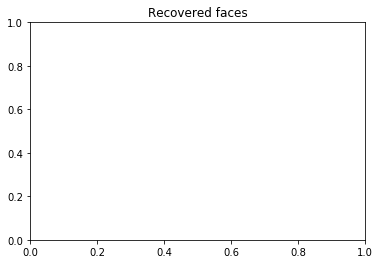

In [20]:
print('\nVisualizing the projected (reduced dimension) faces.');

K = 100;
X_rec  = recoverData(Z, U, K);

# Display normalized data
plt.subplot(1, 2, 1);
displayData(X_norm[0:100,:], example_width=False);
plt.title('Original faces');

# Display reconstructed data from only k eigenfaces
plt.subplot(1, 2, 2);
displayData(X_rec[0:100,:], example_width=False);
plt.title('Recovered faces');


#### Part 8(a): Optional (ungraded) Exercise: PCA for Visualization 

One useful application of PCA is to use it to visualize high-dimensional data. In the last K-Means exercise you ran K-Means on 3-dimensional pixel colors of an image. We first visualize this output in 3D, and then apply PCA to obtain a visualization in 2D.

In [125]:
from scipy.misc import imread
A=imread('bird_small.png')
A.shape

(128, 128, 3)

In [126]:
A = A / 255;
img_size = A.shape;
X = np.reshape(A, (img_size[0] * img_size[1], 3));
K = 16; 
max_iters = 10;

In [127]:
def kMeansInitCentroids(X, K):
#KMEANSINITCENTROIDS This function initializes K centroids that are to be 
#used in K-Means on the dataset X
#   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
#   used with the K-Means on the dataset X
#

# You should return this values correctly
    m,n=X.shape
    choose=np.random.permutation(m)
    centroids = np.zeros((K, X.shape[1]));
    centroids=X[choose[0:K], :]
    return centroids

# ====================== YOUR CODE HERE ======================
# Instructions: You should set centroids to randomly chosen examples from
#               the dataset X


In [128]:
import numpy as np
from matplotlib import colors

def hsv(n=63):
    """
    adapted from Octave's (NOT matlab's) hsv(N) function
      which is equivalent to matlab's hsv2rgb([(0:N-1)'/N, ones(N,2)])
      from: http://octave.sourceforge.net/octave/function/hsv.html
            http://stackoverflow.com/q/23945764/583834
    """

    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1)            , np.ones( ((n+1), 2) ) ]) )

In [129]:
import matplotlib.pyplot as plt
import numpy as np

def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
    #index assignments in idx have the same color
    #   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
    #   with the same index assignments in idx have the same color

    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])

    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)

    return

In [130]:
import matplotlib.pyplot as plt

def drawLine(p1, p2, **kwargs):
#   DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)
    # [p1[0], p2[0]] is the x part
    # [p1[1], p2[1]] is the y part

In [131]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
#   PLOTPROGRESSKMEANS is a helper function that displays the progress of 
#   k-Means as it is running. It is intended for use only with 2D data.
#   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
#   points with colors assigned to each centroid. With the previous
#   centroids, it also plots a line between the previous locations and
#   current locations of the centroids.
# Plot the examples

    plotDataPoints(X, idx, K);

# Plot the centroids as black x's
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='k')

# Plot the history of the centroids with lines
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], c='b')

# Title
    plt.title(print('Iteration number:', i))

In [132]:
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the 
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.

# Useful variables
    m,n=X.shape

# You need to return the following variables correctly.
    centroids = np.zeros((K, n));
    for i in range(K):
        centroids[i,:]=np.array([X[np.where(idx.reshape(-1,)==i)].mean(axis=0)])

# ====================== YOUR CODE HERE ======================
# Instructions: Go over every centroid and compute mean of all points that
#               belong to it. Concretely, the row vector centroids(i, :)
#               should contain the mean of the data points assigned to
#               centroid i.
#
# Note: You can use a for-loop over the centroids to compute this.
#
    return centroids

In [133]:
# Find the closest centroids for the examples using the initial_centroids
def findClosestCentroids(X, centroids):
#   FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

# Set K
    K = centroids.shape[0];

# You need to return the following variables correctly.
    idx = np.zeros((X.shape[0],1));

# ====================== YOUR CODE HERE ======================
# Instructions: Go over every example, find its closest centroid, and store
#               the index inside idx at the appropriate location.
#               Concretely, idx(i) should contain the index of the centroid
#               closest to example i. Hence, it should be a value in the 
#               range 1..K
#
# Note: You can use a for-loop over the examples to compute this.
    for i in range(X.shape[0]):
        disc=1000000000000
        for j in range(K):
            if np.dot((X[i,:]-centroids[j,:]).T, (X[i,:]-centroids[j,:]))<disc:
                disc=np.dot((X[i,:]-centroids[j,:]).T, (X[i,:]-centroids[j,:]))
                idx[i]=j
    return idx

In [134]:
def runkMeans(X, initial_centroids, max_iters, plot_progress): 
                                      
#   RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
#   is a single example
#   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
#   plot_progress) runs the K-Means algorithm on data matrix X, where each 
#   row of X is a single example. It uses initial_centroids used as the
#   initial centroids. max_iters specifies the total number of interactions 
#   of K-Means to execute. plot_progress is a true/false flag that 
#   indicates if the function should also plot its progress as the 
#   learning happens. This is set to false by default. runkMeans returns 
#   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])

# Plot the data if we are plotting progress
# Initialize values
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids = initial_centroids;
    previous_centroids = centroids;
    idx = np.zeros((m, 1));

# Run K-Means
    for i in range(max_iters):
    
    # Output progress
        print('K-Means iteration \n', i, max_iters);
    
    # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids);
           
    # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i);
            previous_centroids = centroids;
            # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K); 
    
    return centroids, idx

K-Means iteration 
 0 10
Iteration number: 0
K-Means iteration 
 1 10
Iteration number: 1
K-Means iteration 
 2 10
Iteration number: 2
K-Means iteration 
 3 10
Iteration number: 3
K-Means iteration 
 4 10
Iteration number: 4
K-Means iteration 
 5 10
Iteration number: 5
K-Means iteration 
 6 10
Iteration number: 6
K-Means iteration 
 7 10
Iteration number: 7
K-Means iteration 
 8 10
Iteration number: 8
K-Means iteration 
 9 10
Iteration number: 9


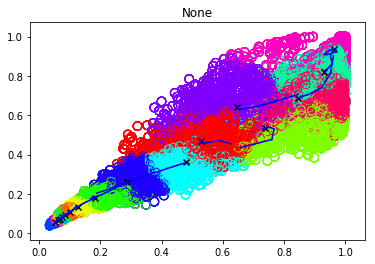

In [135]:
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, plot_progress=True);

In [136]:
#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = (np.floor(np.random.rand(1000, 1) * X.shape[0])).astype(int).flatten();
#  Setup Color Palette
palette = hsv(K);
colors = np.array([palette[int(i)] for i in idx[sel]])

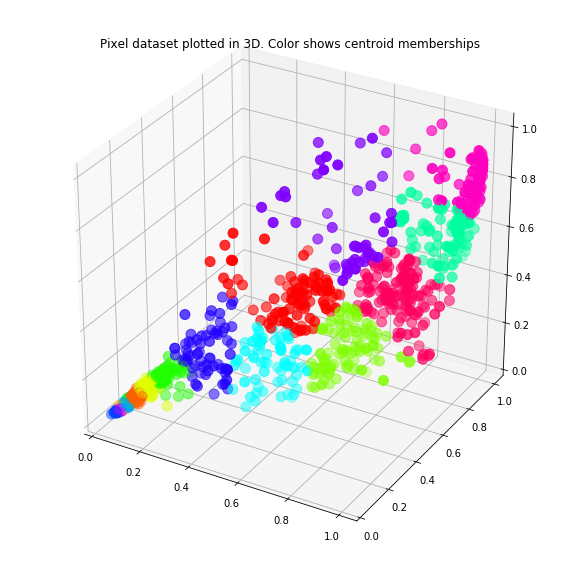

In [137]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[sel,0], X[sel,1], X[sel,2], c=colors,  s=100)
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships');

#### Part 8(b): Optional (ungraded) Exercise: PCA for Visualization 

Use PCA to project this cloud to 2D for visualization

In [138]:
# Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

# PCA and project the data to 2D
[U, S, V] = pca(X_norm);

In [139]:
Z = projectData(X_norm, U, 2);

In [140]:
import numpy as np
from matplotlib import colors

def hsv(n=63):
    """
    adapted from Octave's (NOT matlab's) hsv(N) function
      which is equivalent to matlab's hsv2rgb([(0:N-1)'/N, ones(N,2)])
      from: http://octave.sourceforge.net/octave/function/hsv.html
            http://stackoverflow.com/q/23945764/583834
    """

    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1)            , np.ones( ((n+1), 2) ) ]) )

palette = hsv( 16 )

In [141]:
import matplotlib.pyplot as plt
import numpy as np

def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
    #index assignments in idx have the same color
    #   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
    #   with the same index assignments in idx have the same color

    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])

    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)

    return

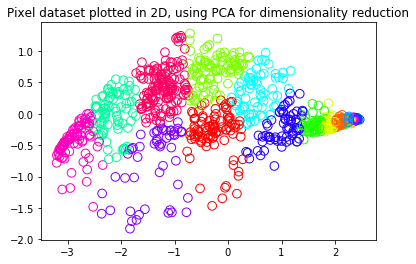

In [142]:
# Plot in 2D
plotDataPoints(Z[sel, :], idx[sel], K);
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');